# Philippine Cities Temperature Prediction

This will predict hourly temperature for 135 Philippine cities. The data set is from 2020 to 2024.

Due to file size, I stored the datasets in google drive as a backup.

Original Source:
- [Philippine Cities Weather Data (2024)](https://www.kaggle.com/datasets/bwandowando/philippine-cities-weather-data-ytd-2024)
- [Philippine Cities Weather Data (2020-2023)](https://www.kaggle.com/datasets/bwandowando/philippine-cities-weather-data-2020-2023)

Google Drive Links:
- [Philippine Cities Weather Data (2024)](https://drive.google.com/file/d/10wxJ3x6NKIGQCL5xpngcgbja6M7hvqJf/view?usp=drive_link)
- [Philippine Cities Weather Data (2020-2023)](https://drive.google.com/file/d/1cwdqQC3Idr7rfCS2AMbROv3be0eZ0SIB/view?usp=drive_link)

In [2]:
%%bash
mkdir -p data/2024
mkdir -p data/2020-2023

In [ ]:
%%bash
curl -L -o "./data/Philippine_Cities_Weather_Data_(2024).zip" "https://www.kaggle.com/api/v1/datasets/download/bwandowando/philippine-cities-weather-data-ytd-2024"
curl -L -o "./data/Philippine_Cities_Weather_Data_(2020-2023).zip" "https://www.kaggle.com/api/v1/datasets/download/bwandowando/philippine-cities-weather-data-2020-2023"

In [ ]:
%%bash
unzip "./data/Philippine_Cities_Weather_Data_(2024).zip" -d "./data/2024"
unzip "./data/Philippine_Cities_Weather_Data_(2020-2023).zip" -d "./data/2020-2023"

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_hourly_2020_2023 = pd.read_csv('data/2020-2023/hourly_data_combined_2020_to_2023.csv')
df_hourly_2024 = pd.read_csv('data/2024/hourly_data_combined_2024.csv')

In [3]:
df_hourly_2020_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944024 entries, 0 to 4944023
Data columns (total 44 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   city_name                         object 
 1   datetime                          object 
 2   temperature_2m                    float64
 3   relative_humidity_2m              float64
 4   dew_point_2m                      float64
 5   apparent_temperature              float64
 6   precipitation                     float64
 7   rain                              float64
 8   snowfall                          float64
 9   snow_depth                        float64
 10  weather_code                      float64
 11  pressure_msl                      float64
 12  surface_pressure                  float64
 13  cloud_cover                       float64
 14  cloud_cover_low                   float64
 15  cloud_cover_mid                   float64
 16  cloud_cover_high                  fl

In [4]:
df_hourly_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979824 entries, 0 to 979823
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   city_name                         979824 non-null  object 
 1   datetime                          979824 non-null  object 
 2   temperature_2m                    974481 non-null  float64
 3   relative_humidity_2m              974481 non-null  float64
 4   dew_point_2m                      974481 non-null  float64
 5   apparent_temperature              974481 non-null  float64
 6   precipitation                     974481 non-null  float64
 7   rain                              974481 non-null  float64
 8   snowfall                          974481 non-null  float64
 9   snow_depth                        787952 non-null  float64
 10  weather_code                      974481 non-null  float64
 11  pressure_msl                      974481 non-null  f

## Data Preparation

### Check if all the cities match in both dataset.

In [5]:
cities_2020_2023 = df_hourly_2020_2023.city_name.unique()
cities_2024 = df_hourly_2024.city_name.unique()
diff_city_2020_2023 = set(cities_2020_2023) - set(cities_2024)
diff_city_2024 = set(cities_2024) - set(cities_2020_2023)

diff_city_2020_2023, diff_city_2024

({'Bago City'}, {'Santiago'})

In [6]:
df_hourly_2020_2023 = df_hourly_2020_2023[df_hourly_2020_2023.city_name != 'Bago City']
df_hourly_2024 = df_hourly_2024[df_hourly_2024.city_name != 'Santiago']

In [7]:
cities_2020_2023 = df_hourly_2020_2023.city_name.unique()
cities_2024 = df_hourly_2024.city_name.unique()
diff_city_2020_2023 = set(cities_2020_2023) - set(cities_2024)
diff_city_2024 = set(cities_2024) - set(cities_2020_2023)

diff_city_2020_2023, diff_city_2024

(set(), set())

### Fix Null Values

In [8]:
df_hourly_2020_2023.isnull().sum()

city_name                                0
datetime                                 0
temperature_2m                           0
relative_humidity_2m                     0
dew_point_2m                             0
apparent_temperature                     0
precipitation                            0
rain                                     0
snowfall                                 0
snow_depth                          596088
weather_code                             0
pressure_msl                             0
surface_pressure                         0
cloud_cover                              0
cloud_cover_low                          0
cloud_cover_mid                          0
cloud_cover_high                         0
et0_fao_evapotranspiration               0
vapour_pressure_deficit                  0
wind_speed_10m                           0
wind_speed_100m                          0
wind_direction_10m                       0
wind_direction_100m                      0
wind_gusts_

In [9]:
df_hourly_2024.isnull().sum()

city_name                                0
datetime                                 0
temperature_2m                        5304
relative_humidity_2m                  5304
dew_point_2m                          5304
apparent_temperature                  5304
precipitation                         5304
rain                                  5304
snowfall                              5304
snow_depth                          191232
weather_code                          5304
pressure_msl                          5304
surface_pressure                      5304
cloud_cover                           5304
cloud_cover_low                       5304
cloud_cover_mid                       5304
cloud_cover_high                      5304
et0_fao_evapotranspiration            5304
vapour_pressure_deficit               5304
wind_speed_10m                        5304
wind_speed_100m                       5304
wind_direction_10m                    5304
wind_direction_100m                   5304
wind_gusts_

In [10]:
pd.to_datetime(df_hourly_2024[df_hourly_2024.temperature_2m.isnull()].datetime).dt.date.unique()

array([datetime.date(2024, 10, 23), datetime.date(2024, 10, 24)],
      dtype=object)

In [11]:
df_hourly_2024.datetime.max()

'2024-10-24 23:00:00'

Since there are too many null values in 10/23/2024 and 10/24/2024, and the max date is at 10/24/2024, these 2 dates will be removed from the dataset of 2024

In [12]:
df_hourly_2024 = df_hourly_2024[df_hourly_2024.datetime < '2024-10-23']

Snow is irrelevant to this country because Philippines is a tropical country. Therefore, `snowfall` and `snow_depth` can be removed.

In [13]:
del df_hourly_2020_2023['snowfall']
del df_hourly_2020_2023['snow_depth']

del df_hourly_2024['snowfall']
del df_hourly_2024['snow_depth']

Fix null values on 2020-2023 data set.

In [14]:
pd.to_datetime(df_hourly_2020_2023[df_hourly_2020_2023.global_tilted_irradiance.isnull()].datetime)

4896582   2022-08-03 06:00:00
Name: datetime, dtype: datetime64[ns]

In [15]:
pd.to_datetime(df_hourly_2020_2023[df_hourly_2020_2023.global_tilted_irradiance_instant.isnull()].datetime)

4896582   2022-08-03 06:00:00
Name: datetime, dtype: datetime64[ns]

In [16]:
df_hourly_2020_2023[df_hourly_2020_2023.global_tilted_irradiance.isnull()]

city_name             datetime  temperature_2m  relative_humidity_2m  \
4896582     Vigan  2022-08-03 06:00:00            24.8                  94.0   

         dew_point_2m  apparent_temperature  precipitation  rain  \
4896582          23.9                  29.9            1.9   1.9   

         weather_code  pressure_msl  ...  diffuse_radiation  \
4896582          61.0        1008.6  ...                2.0   

         direct_normal_irradiance  global_tilted_irradiance  \
4896582                       0.0                       NaN   

         terrestrial_radiation  shortwave_radiation_instant  \
4896582                   38.5                          5.0   

         direct_radiation_instant  diffuse_radiation_instant  \
4896582                       0.0                        5.0   

         direct_normal_irradiance_instant  global_tilted_irradiance_instant  \
4896582                               0.0                               NaN   

         terrestrial_radiation_instant  
4896582                           96.5  

[1 rows x 42 columns]

In [17]:
df_hourly_2020_2023[(df_hourly_2020_2023.datetime > '2022-08-03 0000:00') & 
                    (df_hourly_2020_2023.datetime < '2022-08-04 00:00:00') &
                    (df_hourly_2020_2023.city_name == 'Vigan')].global_tilted_irradiance

4896576      0.0
4896577      0.0
4896578      0.0
4896579      0.0
4896580      0.0
4896581      0.0
4896582      NaN
4896583     50.0
4896584     76.0
4896585    375.0
4896586    386.0
4896587    630.0
4896588    556.0
4896589    710.0
4896590    684.0
4896591    439.0
4896592    362.0
4896593    113.0
4896594     30.0
4896595      6.0
4896596      0.0
4896597      0.0
4896598      0.0
4896599      0.0
Name: global_tilted_irradiance, dtype: float64

In [18]:
df_hourly_2020_2023[(df_hourly_2020_2023.datetime > '2022-08-03 00:00:00') & 
                    (df_hourly_2020_2023.datetime < '2022-08-04 00:00:00') &
                    (df_hourly_2020_2023.city_name == 'Vigan')].global_tilted_irradiance_instant

4896577      0.0
4896578      0.0
4896579      0.0
4896580      0.0
4896581      0.0
4896582      NaN
4896583     80.7
4896584     95.6
4896585    430.2
4896586    419.9
4896587    659.3
4896588    563.2
4896589    697.0
4896590    648.9
4896591    399.2
4896592    309.2
4896593     85.5
4896594     14.4
4896595      0.0
4896596      0.0
4896597      0.0
4896598      0.0
4896599      0.0
Name: global_tilted_irradiance_instant, dtype: float64

Fill NA with 0

In [19]:
df_hourly_2020_2023 = df_hourly_2020_2023.fillna(0)

Recheck Null Values

In [20]:
df_hourly_2020_2023.isnull().sum()

city_name                           0
datetime                            0
temperature_2m                      0
relative_humidity_2m                0
dew_point_2m                        0
apparent_temperature                0
precipitation                       0
rain                                0
weather_code                        0
pressure_msl                        0
surface_pressure                    0
cloud_cover                         0
cloud_cover_low                     0
cloud_cover_mid                     0
cloud_cover_high                    0
et0_fao_evapotranspiration          0
vapour_pressure_deficit             0
wind_speed_10m                      0
wind_speed_100m                     0
wind_direction_10m                  0
wind_direction_100m                 0
wind_gusts_10m                      0
soil_temperature_0_to_7cm           0
soil_temperature_7_to_28cm          0
soil_temperature_28_to_100cm        0
soil_temperature_100_to_255cm       0
soil_moistur

In [21]:
df_hourly_2024.isnull().sum()

city_name                           0
datetime                            0
temperature_2m                      0
relative_humidity_2m                0
dew_point_2m                        0
apparent_temperature                0
precipitation                       0
rain                                0
weather_code                        0
pressure_msl                        0
surface_pressure                    0
cloud_cover                         0
cloud_cover_low                     0
cloud_cover_mid                     0
cloud_cover_high                    0
et0_fao_evapotranspiration          0
vapour_pressure_deficit             0
wind_speed_10m                      0
wind_speed_100m                     0
wind_direction_10m                  0
wind_direction_100m                 0
wind_gusts_10m                      0
soil_temperature_0_to_7cm           0
soil_temperature_7_to_28cm          0
soil_temperature_28_to_100cm        0
soil_temperature_100_to_255cm       0
soil_moistur

Convert `datetime` column to DateTime datatype

In [22]:
df_hourly_2020_2023['datetime'] = pd.to_datetime(df_hourly_2020_2023['datetime'])
df_hourly_2024['datetime'] = pd.to_datetime(df_hourly_2024['datetime'])

Replace `city_name` spaces with `_` and lowercase all letters

In [23]:
df_hourly_2020_2023['city_name'] = df_hourly_2020_2023['city_name'].str.replace(' ', '_').str.lower()
df_hourly_2024['city_name'] = df_hourly_2024['city_name'].str.replace(' ', '_').str.lower()

### Combine data of 2020-2023 and 2024

In [24]:
df_full = pd.concat([df_hourly_2020_2023, df_hourly_2024])

In [25]:
df_full = df_full.reset_index(drop=True)

#### Feature Engineering

In [26]:
df = df_full.copy(deep=True)

In [27]:
df.columns

Index(['city_name', 'datetime', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain',
       'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover',
       'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'shortwave_radiation', 'direct_radiation',
       'diffuse_radiation', 'direct_normal_irradiance',
       'global_tilted_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'direct_radiation_instant',
       'diffuse_radiation_instant', 'direct_norm

In [28]:
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day_of_week'] = df.datetime.dt.day_of_week
df['hour'] = df.datetime.dt.hour

In [29]:
del df['datetime']

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
numericals = df.columns[df.dtypes != 'object'].to_list()

In [43]:
numericals.remove('temperature_2m')
# numericals.remove('apparent_temperature')

# targets = ['temperature_2m', 'apparent_temperature']
target = ['temperature_2m']

In [46]:
transformations = [
    ('numerical', 'passthrough', numericals),
    ('categories', OneHotEncoder(dtype='int32', sparse_output=False), ['city_name']),
]

In [47]:
transformer = ColumnTransformer(transformations, remainder='drop')
transformer.fit(df)
transformer.get_feature_names_out()

array(['numerical__relative_humidity_2m', 'numerical__dew_point_2m',
       'numerical__apparent_temperature', 'numerical__precipitation',
       'numerical__rain', 'numerical__weather_code',
       'numerical__pressure_msl', 'numerical__surface_pressure',
       'numerical__cloud_cover', 'numerical__cloud_cover_low',
       'numerical__cloud_cover_mid', 'numerical__cloud_cover_high',
       'numerical__et0_fao_evapotranspiration',
       'numerical__vapour_pressure_deficit', 'numerical__wind_speed_10m',
       'numerical__wind_speed_100m', 'numerical__wind_direction_10m',
       'numerical__wind_direction_100m', 'numerical__wind_gusts_10m',
       'numerical__soil_temperature_0_to_7cm',
       'numerical__soil_temperature_7_to_28cm',
       'numerical__soil_temperature_28_to_100cm',
       'numerical__soil_temperature_100_to_255cm',
       'numerical__soil_moisture_0_to_7cm',
       'numerical__soil_moisture_7_to_28cm',
       'numerical__soil_moisture_28_to_100cm',
       'numerical_

In [48]:
X = transformer.transform(df)
y = df.temperature_2m.values

In [50]:
corr = pd.DataFrame(data=X, columns=transformer.get_feature_names_out()).corr()


In [51]:
sort_corr = corr.abs().unstack().sort_values(kind="quicksort")

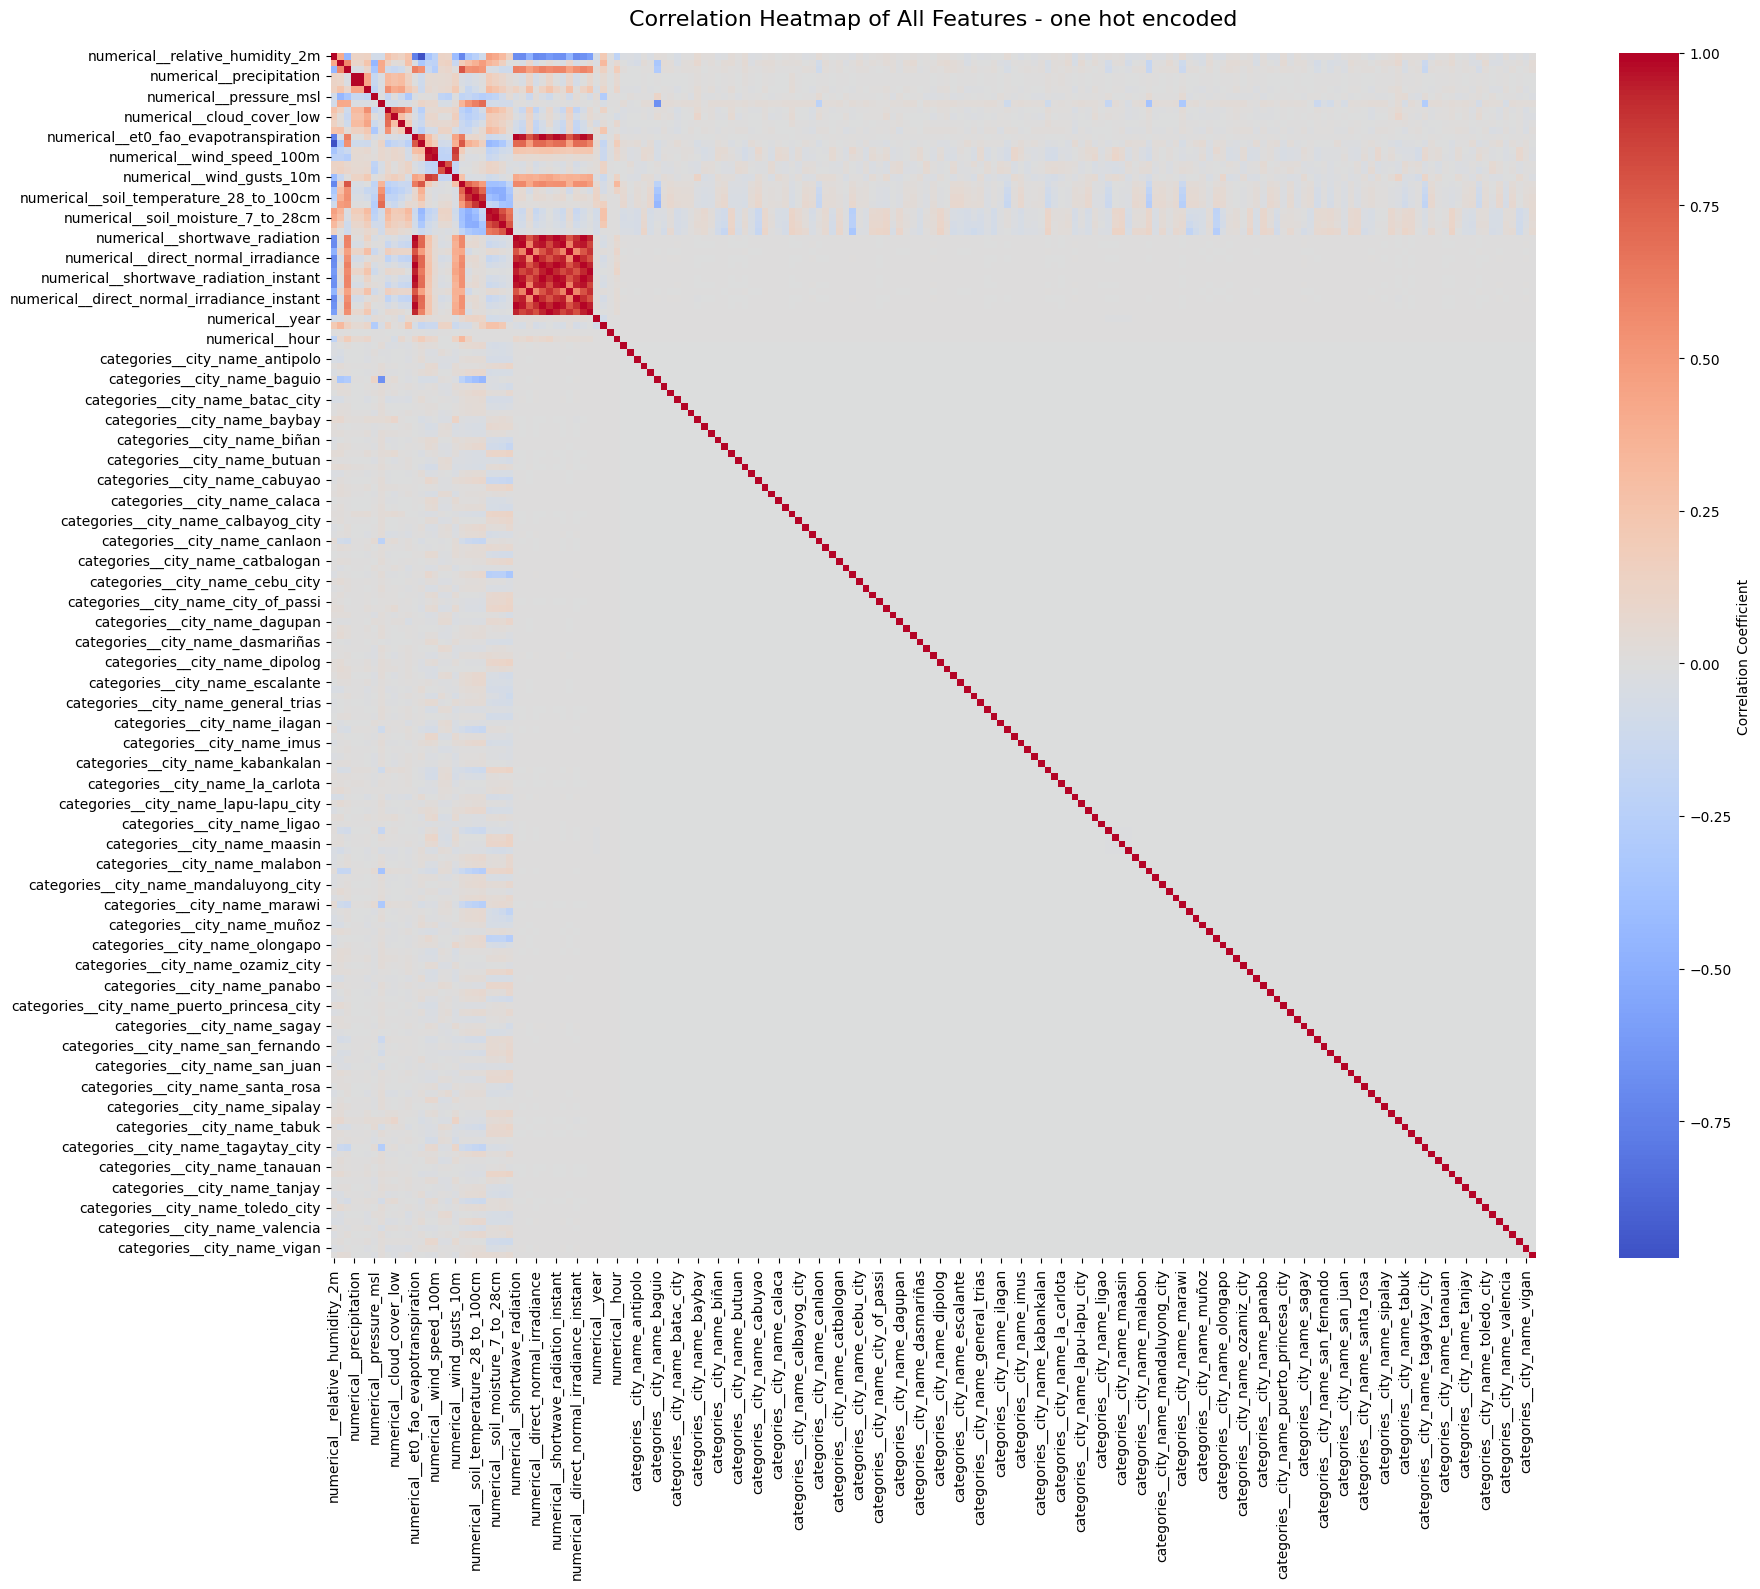

In [58]:
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=False,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
)

plt.title("Correlation Heatmap of All Features - one hot encoded", pad=20, size=16)
plt.tight_layout()
plt.show()

In [66]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sort_corr)

numerical__hour                              categories__city_name_canlaon                  1.807686e-17
categories__city_name_canlaon                numerical__hour                                1.807686e-17
numerical__hour                              categories__city_name_caloocan_city            3.201260e-17
categories__city_name_caloocan_city          numerical__hour                                3.201260e-17
numerical__day_of_week                       numerical__hour                                3.978679e-17
numerical__hour                              numerical__day_of_week                         3.978679e-17
categories__city_name_palayan_city           numerical__hour                                6.096898e-17
numerical__hour                              categories__city_name_palayan_city             6.096898e-17
categories__city_name_olongapo               numerical__hour                                6.675590e-17
numerical__hour                              categories

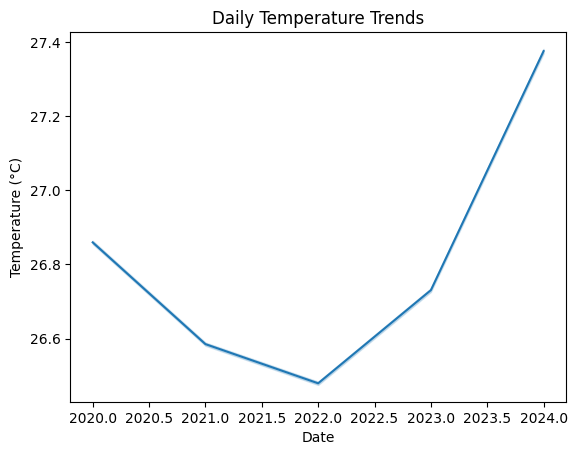

In [37]:
sns.lineplot(data=df, x='year', y='temperature_2m')
plt.title('Daily Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

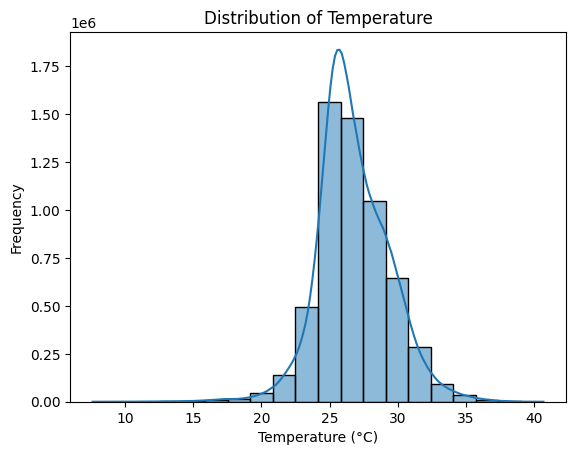

In [40]:
sns.histplot(data=df, x='temperature_2m', bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# df_full[features].corrwith(np.log1p(df_full.temperature_2m)).abs()